In [53]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

In [56]:
df = pd.read_csv('data/CreditScoring.csv')

In [57]:
df.columns = df.columns.str.lower()

In [58]:
status_values = {
    0:'unk',
    1:'ok',
    2:'default'
}
df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [59]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [60]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [61]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [62]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [63]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [64]:
df.status.describe

<bound method NDFrame.describe of 0            ok
1            ok
2       default
3            ok
4            ok
         ...   
4449    default
4450         ok
4451    default
4452         ok
4453         ok
Name: status, Length: 4454, dtype: object>

In [65]:
df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=11 )
df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=11 )

y_train = (df_train.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
len(y_val)

891

In [66]:
del df_train['status']
del df_test['status']
del df_val['status']

In [67]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [68]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [70]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
val_dict = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.6375788084648844

In [72]:
y_pred = model.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
auc

1.0

In [73]:
test_dict = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dict)
y_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
auc

0.6594384974934006

Видно, да, что что-то тут не так? Это называется оверфиттинг. Дерево запоминает все возможные варианты и просто говорит да или нет. Для всех тестовых вариантов оно научилось делать 100% предсказания, но если с походими параметрами попадаются варианты с другим ответом, оно дает неправильный результат.

In [74]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [75]:
y_pred = model.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print(auc)

y_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(auc)

0.7054989859726213
0.6598681638238599


In [76]:
print(export_text(model, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



c:\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


через экспорт текста мы увидели, на каких вопросах построило свое предсказание наше дерево. Но глубина в 2 вопроса может быть недостаточной, посмотрим на разные варианты глубины.

In [77]:
scores = []
for d in [1, 2, 3, 4, 5, 6, 7, 10, 15]:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((d, auc))

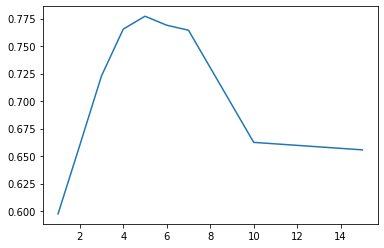

In [78]:
df_res = pd.DataFrame(scores, columns =['max_depth', 'auc'])
plt.plot(df_res.max_depth, df_res.auc)

Как видно, глубина в 5 вопросов дает самый точный результат. Теперь посмотрим на параметр максимального количества листьев (т.е. размер группы после итогого отсечения)

In [79]:
max_depth = 5
scores = []
for s in [2, 5, 10, 15, 100, 200]:

#     for d in [1, 2, 3, 4, 5, 6, 7, 10, 15]:
    model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=s)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((s, auc))

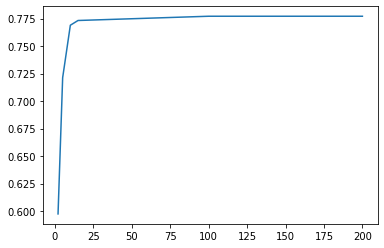

In [80]:
df_res = pd.DataFrame(scores, columns =['max_leaf_nodes', 'auc'])
plt.plot(df_res.max_leaf_nodes, df_res.auc)

In [81]:
df_res.iloc[df_res['auc'].idxmax()]

max_leaf_nodes    100.000000
auc                 0.777137
Name: 4, dtype: float64

Что ж, наша модель говорит, что максимальное число нод может быть равным 100.))) Но из графика видно, что от 15 уже норм

In [82]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [83]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [84]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.765  0.777  0.774
5                 0.765  0.778  0.767
10                0.765  0.776  0.770
15                0.761  0.774  0.777
20                0.760  0.774  0.764
100               0.757  0.771  0.778
200               0.751  0.761  0.764
500               0.699  0.699  0.699

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

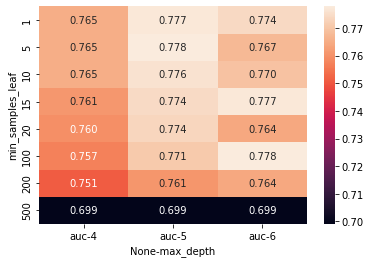

In [85]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

В третьем случае мы попытались посмотреть, что будет, если взять топ наших глубин и посмотреть количество нод для них. Как видим, лучше оказалась глубина в 6 вопросов (ранее мы выбрали 5). Но такой подход не всегда возможен, мы тупо можем убить ресурсы ПК для тренировки большого дерева чрезмерным наложением.

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)

In [88]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [89]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [90]:
roc_auc_score(y_val, y_pred)

0.7762817066614535

Рандомный лес - набор деревьев с разными параметрами отсечек внутри, выбранными случайно.) Если одно дерево может натренироваться только на одном наборе параметров, то несколько - на разных комбинациях, что улучшает средний показатель модели. Это так называемые ансамбли, где много моделек строятся в одну, нивелируя выбросы и недочеты каждой из них. Кстати, простой лес дает такую же точность, как наше прокачанное дерево. Теперь будем улучшать.

In [91]:
scores = []
for c in range (10, 201, 10):
    rf = RandomForestClassifier(n_estimators=c, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((c, auc))

In [92]:
columns = ['n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

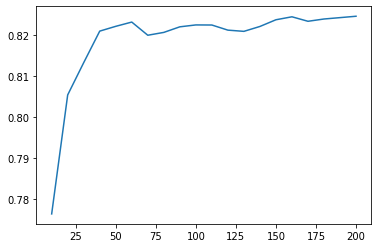

In [93]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Сперва мы посмотрели на количество наученных нами деревьев. По графику видно, что от 100 стандартное отклонение у нас уменьшается, т.е. логично взять лес от 100 деревьев. Теперь добавим уже знакомые глубину и количство нод в листьях.

In [94]:
scores = []
for d in [5, 10, 15]:
    for c in range (10, 201, 10):
        rf = RandomForestClassifier(n_estimators=c,max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, c, auc))

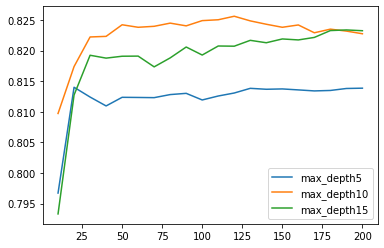

In [95]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
for d in [5, 10, 15]:
    df_sub = df_scores[df_scores.max_depth == d]
    plt.plot(df_sub.n_estimators, df_sub.auc, label='max_depth%d' %d)
    
plt.legend()

Очевидная десяточка

In [96]:
max_depth = 10
max_leaf_nodes = 50

In [97]:
scores = []
for s in [3, 5, 10, 50]:
    for c in range (10, 201, 10):
        rf = RandomForestClassifier(n_estimators=c,
                                    max_depth=max_depth,
                                    max_leaf_nodes=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, c, auc))

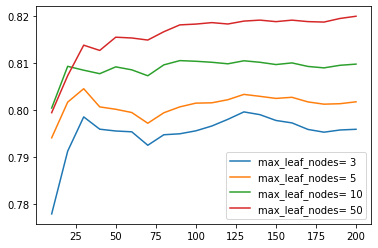

In [98]:
columns = ['max_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
for s in [3, 5, 10, 50]:
    df_sub = df_scores[df_scores.max_leaf == s]
    plt.plot(df_sub.n_estimators, df_sub.auc, label='max_leaf_nodes= %d' %s)
    
plt.legend()

Очевидно, что 50, теперь можно натренировать итоговую модель

In [99]:
rf = RandomForestClassifier(n_estimators=120, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)

In [100]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=50, n_estimators=120)

In [101]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.818655002199306

In [102]:
import xgboost as xgb

In [104]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [106]:
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 2,
    
    'objective' : 'binary:logistic',
    'nthread' : 8,
    
    'seed' : 1,
    'verbosity' : 0
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [109]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.7944259811348419

Градиентный бустинг - метод тренировки модели, когда каждая следующая модель учится на ошибках предыдущей. XGBoost - библиотека, оптимизирующая бустинг, позволяет параллельно работать нескольким процессам. Коэффициент eta - уровень спуска, чем он ниже, тем медленнее но качественнее учится модель (приемлемо до 0,05); objective - модель, на которой учимся, nthread - количество потоков; verbosity - вывод ошибок (0 - никакого выводв, 1 - только варнинги, 2 - инфо)

In [110]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [130]:
%%capture output

xgb_params = {
    'eta' : 0.1,
    'max_depth' : 3,
    'min_child_weight' : 30,
    
    'objective' : 'binary:logistic',
    'nthread' : 8,
    'eval_metric' : 'auc',
    
    'seed' : 1,
    'verbosity' : 0
}
model = xgb.train(xgb_params, dtrain, num_boost_round=175, evals=watchlist, verbose_eval=5)

In [131]:
def parse_output(output):
    result = []
    for line in output.stdout.strip().split('\n'):
        in_line, train_line, val_line = line.split('\t')
        it = int(in_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        result.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df = pd.DataFrame(result, columns=columns)
    return df

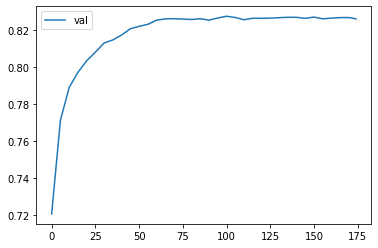

In [132]:
df_out = parse_output(output)
# plt.plot(df_out.num_iter, df_out.train_auc, label='train')
plt.plot(df_out.num_iter, df_out.val_auc, label='val')
plt.legend()

В первоначальной модели изменили eta на 0,1, глубину на 3 и листья на 30. Так точность получилась самая высокая

добавили в бустинг метрики проверки, плюс два датасета для тренировки и валидации. Видим, что на некотором этапе на тренировочном датасете наша мождель доходит до 1, это оверфиттинг, такое количество итераций мы брать не будем.